In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's recall the NBA salary data we were using last time.

In [2]:
bb=pd.read_csv('nba2022-23salary_small.csv')

In [3]:
bb.head()

,Player Name,Salary,Position,Age,Team
0,Stephen Curry,48070014,PG,34,GSW
1,John Wall,47345760,PG,32,LAC
2,Russell Westbrook,47080179,PG,34,LAL/LAC
3,LeBron James,44474988,PF,38,LAL
4,Kevin Durant,44119845,PF,34,BRK/PHO


We has asked some questions including:

1. Relationship between position and salary.
2. Relationship between age and salary.

In [4]:
bb['Position'].value_counts()

Position
SG       115
SF        91
C         91
PF        86
PG        77
PG-SG      2
SF-SG      2
SG-PG      2
SF-PF      1
Name: count, dtype: int64

And we decided to recode the low-population position combos:

In [5]:
recode_mapping={
            'PG-SG': 'PG',
            'SF-SG': 'SF',
            'SG-PG': 'SG',
            'SF-PF': 'SF'
        }

In [6]:
bb['Position']=bb['Position'].replace(recode_mapping)

In [7]:
help(bb['Position'].replace)

Help on method replace in module pandas.core.generic:

replace(
    to_replace=None,
    value=<no_default>,
    *,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    regex: 'bool_t' = False,
    method: "Literal['pad', 'ffill', 'bfill'] | lib.NoDefault" = <no_default>
) -> 'Self | None' method of pandas.core.series.Series instance
    Replace values given in `to_replace` with `value`.

    Values of the Series/DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.

    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.

        * numeric, str or regex:

            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with 

In [8]:
bb['Position'].value_counts()

Position
SG    117
SF     94
C      91
PF     86
PG     79
Name: count, dtype: int64

We also saw that the distribution of salaries tends to be very right skewed.

<Axes: >

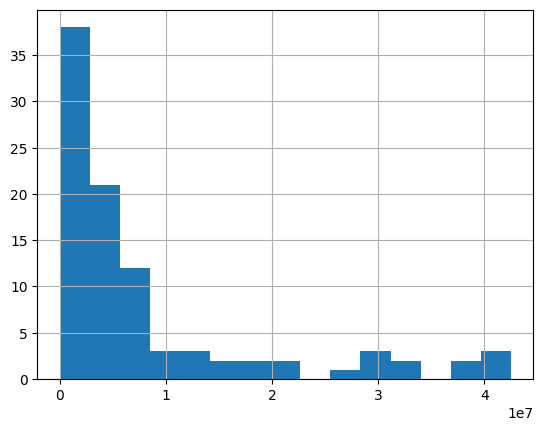

In [9]:
bb.loc[bb['Position']=='SF']['Salary'].hist(bins=15)

<Axes: >

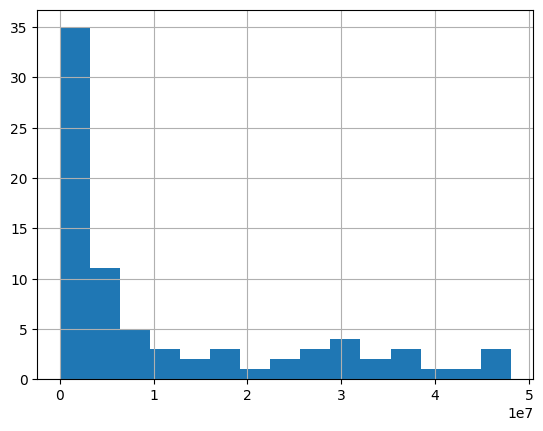

In [10]:
bb.loc[bb['Position']=='PG']['Salary'].hist(bins=15)

<Axes: >

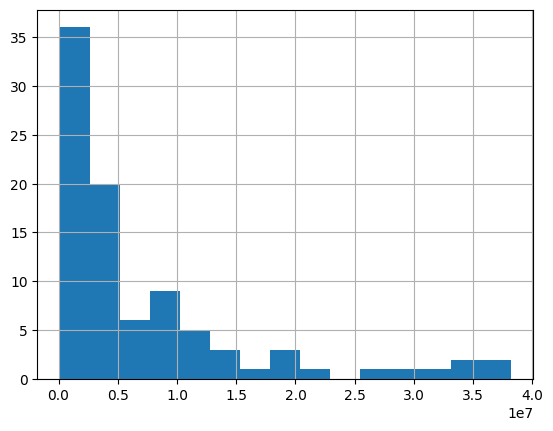

In [11]:
bb.loc[bb['Position']=='C']['Salary'].hist(bins=15)

A consequence is that the mean is pulled to the right by outliers. The median might be a more reasonable measure of center because it is *resistant* to the pull of outliers.

In [12]:
bb['Salary'].describe()

count    4.670000e+02
mean     8.416599e+06
std      1.070812e+07
min      5.849000e+03
25%      1.782621e+06
50%      3.722040e+06
75%      1.063354e+07
max      4.807001e+07
Name: Salary, dtype: float64

In [13]:
bb['SalaryM']=bb['Salary']/1000000

In [14]:
bb['SalaryM'].describe()

count    467.000000
mean       8.416599
std       10.708118
min        0.005849
25%        1.782621
50%        3.722040
75%       10.633544
max       48.070014
Name: SalaryM, dtype: float64

The `.describe()` method is a great way to get summary statistics for a quantitative column.

We can see that the mean is much larger than the median, pulled out by the right tail of the salary distribution.

We also said that we often want to understand the measure of *spread*: How spread out around the middle is the data.  

The *standard deviation* (given in the table created by the `.describe` method) is the measure of spread relative to the mean.

If we prefer the median as our measure of center then a boxplot is a nice way to visualize the spread. It shows the min, max, and three *quartiles*.

Quartiles: 

1st quartile is the value below which we have 25% of the data.

2nd quartile is the median: 50% of the data below.

3rd quartile is the value below which we have 75% of the data.

5 number summary:

min ---- Q1 ---- M ---- Q3 ---- max

All in the box plot. 

Define: IQR = interquartile range = Q3-Q1

Outlier: an observation more than 1.5*IQR above or below the median.

<Axes: >

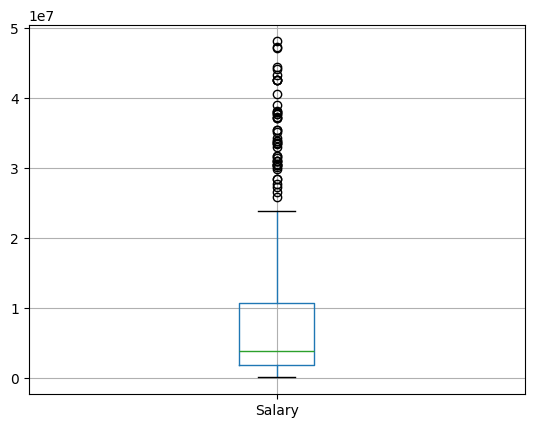

In [15]:
bb.boxplot('Salary')

<Axes: title={'center': 'Salary'}, xlabel='Position'>

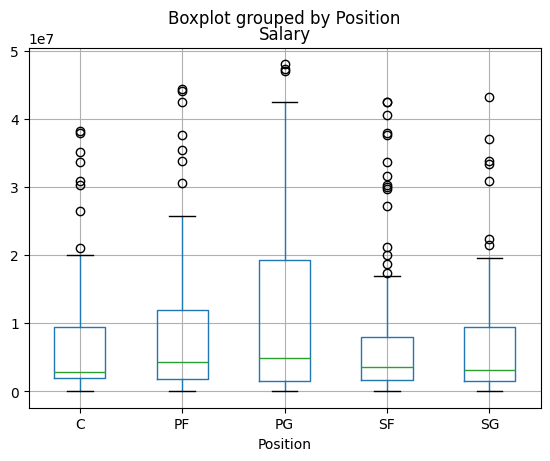

In [16]:
bb.boxplot('Salary',by='Position')

Note: If $k$ is a number between 1 and 99 then the $k$-th percentile is the value below which we have $k\%$ of the data.

Example: $k$=90: use the `.quantile()` method with input $k/100$.

In [17]:
bb['SalaryM'].quantile(0.90)

np.float64(26.083880800000024)

OK: We broke down `Salary` by the categorical variable `Position`.

Sometimes we are interested in the relationship between two quantitative variables. FOr example, for each player I can observe: 

Age of player = $x$

Salary of player = $y$

and plot $(x,y)$ for each player.

Use the `.scatterplot` method on the dataframe and tell python what $x$ and $y$ are. 

<Axes: xlabel='Age', ylabel='SalaryM'>

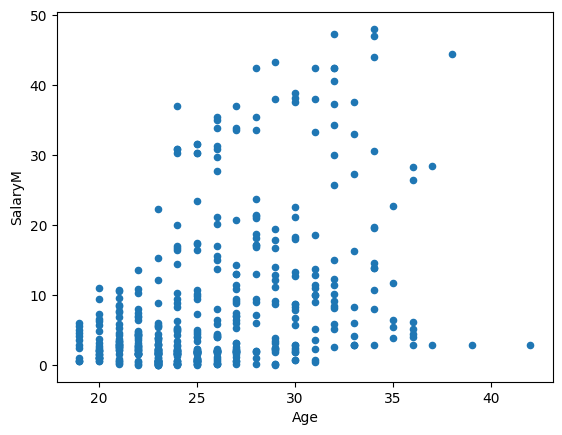

In [18]:
bb.plot.scatter(x='Age',y='SalaryM')

Lots to talk about here... more on that later. For now, does it seem reasonable to say that while there is a lot of salary variability across all values of age, it does seem that on average salaries increase a bit with age. This is a stats question.

One more example of how to make visuals. Say we wanted to display two histograms on the same plot. Ex: Compare PGs and Cs.

We can first create the subsets we are interested in. Then create histograms using the `plt` object from `matplotlib`. Then show them together. 

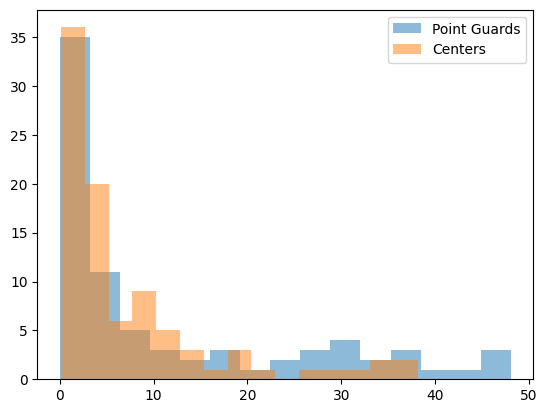

In [19]:
plt.hist(bb.loc[(bb['Position']=='PG')]['SalaryM'], alpha=0.5, label='Point Guards', bins=15)
plt.hist(bb.loc[(bb['Position']=='C')]['SalaryM'], alpha=0.5, label='Centers', bins=15)
plt.legend()
plt.show()

Note: The `alpha` parameter creates transparancy so we can see both histograms when they overlap. The `plt.legend()` creates the label box in the upper right corner.

This is our first foray into `matplotlib`. It gives us lots of fine-grained control over images but has kind of dense and mysterious syntax.

### Functions

We've worked with functions: input/output

In [20]:
len([1,2,3,4,5,6,7,8])

8

In [21]:
max([-800,0,3])

3

In [22]:
min([-800,0,3])

-800

In [23]:
divmod(11,4)

(2, 3)

Here, there are two inputs and two outputs.

Sometimes we need/want our own functions.

In [24]:
def cube_plus(x):
    ''' 
    This function will take an input of x, cube it, and 1, and
    return the result.
    '''
    return x**3+1

In [25]:
cube_plus(10)

1001

In [26]:
def pct_tot(part,whole):
    """
    Compute part as a percent of whole and 
    return the resulting percentage.
    """
    return (part/whole)*100

In [27]:
pct_tot(11,200)

5.5

And sometimes we want to apply a function to every column of a data frame. We've seen some ways to do that when the functions are familiar (like subtract and divide etc.).

In [28]:
import pandas as pd

In [29]:
ht=pd.read_csv('FamilyHeightData.csv')

In [30]:
ht.head()

,family,children,childNum,gender,MotherHt,FatherHt,ChildHt
0,1,4,1,male,5-7.0,6-6.5,6-1.2
1,1,4,2,female,5-7.0,6-6.5,5-9.2
2,1,4,3,female,5-7.0,6-6.5,5-9.0
3,1,4,4,female,5-7.0,6-6.5,5-9.0
4,2,4,1,male,5-6.5,6-3.5,6-1.5


In [31]:
ht.shape

(934, 7)

This data set gives 934 observations on the height of adult children and the corresponding heights of their parents. The researcher was interested in the relationship between how height is passed to future generations genetically.  

Let's compute the average of the `ChildHt` column.

Go ahead and do it!

In [32]:
ht.dtypes

family      object
children     int64
childNum     int64
gender      object
MotherHt    object
FatherHt    object
ChildHt     object
dtype: object

In [33]:
ht['ChildHt']

0      6-1.2
1      5-9.2
2      5-9.0
3      5-9.0
4      6-1.5
       ...  
929    5-4.0
930    5-2.0
931    5-1.0
932    5-6.5
933    4-9.0
Name: ChildHt, Length: 934, dtype: object

In [34]:
def fix_ht(string):
    '''
    Input a height as a string like '6-3'
    Return the height in inches
    '''
    xs = string.split('-')
    inches = int(xs[0]) * 12 + float(xs[1])
    return inches

In [35]:
x=ht['ChildHt'][0]
xs = x.split('-')
int(xs[0])


6

In [36]:
fix_ht(ht['ChildHt'][0])

73.2

Oops!

In [37]:
ht.dtypes

family      object
children     int64
childNum     int64
gender      object
MotherHt    object
FatherHt    object
ChildHt     object
dtype: object

The height columns are not numerical data because of the format.

We'd like to convert the "feet-inches" format to inches. Let's try to write a function that will do that and then see how we can apply that function to all the rows of the dataframe.

In [38]:
def fix_ht(strval):
    '''
    Input a height as a string like '6-3'
    Return the height in inches like 75.
    '''
    return ????

SyntaxError: invalid syntax (676218416.py, line 6)

In [39]:
x=ht['ChildHt'][0]

In [40]:
type(x)

str

In [41]:
x.split('-')

['6', '1.2']

In [42]:
xs=x.split('-')

In [43]:
print(xs[0],",",xs[1])

6 , 1.2


In [44]:
int(xs[0])

6

In [45]:
float(xs[1])

1.2

In [46]:
int(xs[0])*12+float(xs[1])

73.2

In [47]:
def fix_ht(strval):
    '''
    Input a height as a string like '6-3'
    Return the height in inches like 75.
    '''
    x=strval.split("-")
    return 12*int(x[0])+float(x[1])

In [48]:
fix_ht(ht['ChildHt'][1])

69.2

Now: apply this function to every row: 

In [49]:
ht['ChildHt_inches']=ht['ChildHt'].apply(fix_ht)

In [50]:
ht.head()

,family,children,childNum,gender,MotherHt,FatherHt,ChildHt,ChildHt_inches
0,1,4,1,male,5-7.0,6-6.5,6-1.2,73.2
1,1,4,2,female,5-7.0,6-6.5,5-9.2,69.2
2,1,4,3,female,5-7.0,6-6.5,5-9.0,69.0
3,1,4,4,female,5-7.0,6-6.5,5-9.0,69.0
4,2,4,1,male,5-6.5,6-3.5,6-1.5,73.5


Great! Now do the same for mom & dad:

In [51]:
ht['FatherHt_inches']=ht['FatherHt'].apply(fix_ht)
ht['MotherHt_inches']=ht['MotherHt'].apply(fix_ht)

In [52]:
ht.head()

,family,children,childNum,gender,MotherHt,FatherHt,ChildHt,ChildHt_inches,FatherHt_inches,MotherHt_inches
0,1,4,1,male,5-7.0,6-6.5,6-1.2,73.2,78.5,67.0
1,1,4,2,female,5-7.0,6-6.5,5-9.2,69.2,78.5,67.0
2,1,4,3,female,5-7.0,6-6.5,5-9.0,69.0,78.5,67.0
3,1,4,4,female,5-7.0,6-6.5,5-9.0,69.0,78.5,67.0
4,2,4,1,male,5-6.5,6-3.5,6-1.5,73.5,75.5,66.5


By the way, if we wanted to consider the researcher's motivating question we might want to look at scatterplots and averages. Also, we might want to use a combined parent height like the average of the mom and dad height.

In [53]:
ht['ParentAvg']=(ht['FatherHt_inches']+ht['MotherHt_inches'])/2

<Axes: xlabel='ParentAvg', ylabel='ChildHt_inches'>

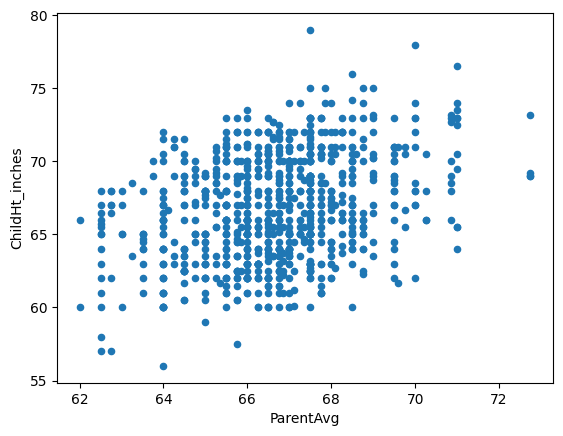

In [54]:
ht.plot.scatter(x='ParentAvg',y='ChildHt_inches')

We might want to deal with `gender` category.

We'll come back to this but it's possible:

In [55]:
colors = ht['gender'].map({'male': 'red', 'female': 'blue'})

<Axes: xlabel='ParentAvg', ylabel='ChildHt_inches'>

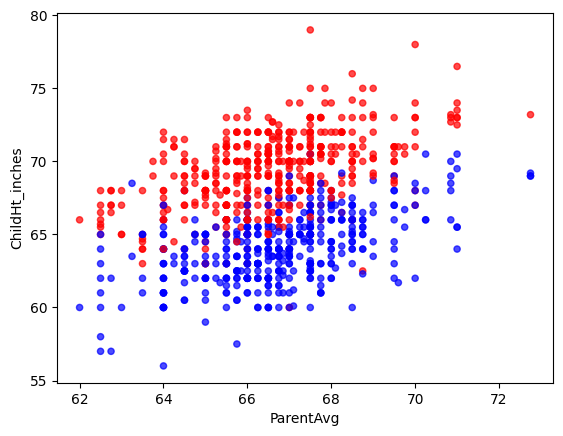

In [56]:
ht.plot.scatter(x='ParentAvg', y='ChildHt_inches', c=colors, alpha=0.7)

## Lab time

1. Input the boston marathon dataset.

   This is the results of the 2025 Boston marathon run on April 21, 2025. Typically finishing times are    reported in hours, minutes, and seconds. 





    Note: You might get an error along the lines of:

   `UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf6 in position 35567: invalid start byte`

   That means there are special characters in the data set (like accents) that the default readere doesn't      know what to do with. Try:

   `bm=pd.read_csv('data/Boston2025_results.csv',encoding='latin-1')`

2. Compute the average finishing time. You might need to fix the `OfficialTime` column.

3. Find the average time for men.

4. Find the average time for women.

5. Display two histograms, one showing the finishing times for men and one for women, on the same plot.

6. How would you describe the distribution of finishing times? Does the distribution change dramatically between men and women?

7. Find the 90th percentile finishing time for women.

8. The Boston marathon has age groups. One such group is age 50-54. Find summary statistics for men and women (separately) in the 50-54 age group. (Mean, Median, Quartiles, Standard deviation.)

9. Make a boxplot of the Official Time in the 50-54 age group broken down by men and women.

10. Find the fastest and slowest US states. Use the `StateAbbrev` column. Get rid of all the Canadian Provinces and territories. You might want/need to get a list of all `StateAbbrev` values using `bm['StateAbbrev'].unique().to_list()` and then use the `.isin()` method.

11. Compare Massachusetts to California in terms of Official Time. Make a case for which state had faster runners. Make a boxplot that displays information relevant to your comparison. 
    

In [57]:
#1
bm = pd.read_csv("Boston2025_results.csv" ,encoding='latin-1')
bm.head()

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,John Korir,"Korir, John",28,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:04:45,1,1,1.0,Runners,NaN,NaN
1,7,Alphonce Felix Simbu,"Simbu, Alphonce Felix",33,M,NaN,NaN,NaN,NaN,TAN,Tanzania,TAN,Tanzania,2:05:04,2,2,2.0,Runners,NaN,NaN
2,4,Cybrian Kotut,"Kotut, Cybrian",32,M,NaN,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:05:04,3,3,3.0,Runners,NaN,NaN
3,18,Conner Mantz,"Mantz, Conner",28,M,NaN,NaN,NaN,NaN,USA,United States of America,USA,United States of America,2:05:08,4,4,4.0,Runners,NaN,NaN
4,39,Muktar Edris,"Edris, Muktar",31,M,NaN,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,2:05:59,5,5,5.0,Runners,NaN,NaN


In [58]:
bm.dtypes

BibNumber              object
FullName               object
SortName               object
AgeOnRaceDay            int64
Gender                 object
City                   object
StateAbbrev            object
StateName              object
Zip                    object
CountryOfResAbbrev     object
CountryOfResName       object
CountryOfCtzAbbrev     object
CountryOfCtzName       object
OfficialTime           object
RankOverall             int64
RankOverGender          int64
RankOverDivision      float64
EventGroup             object
SubGroupLabel          object
SubGroup               object
dtype: object

In [59]:
def HoursToMinutes(hours):
    ''' This function converts hours to minutes'''
    x = hours.split(':')
    first = int(x[0])
    second = int(x[1])
    third = float(x[2])
    
    first = first * 60 
    second = second
    third = third/60
    
    
    return first + second + third

In [60]:
example = bm["OfficialTime"][0]
#example = example.split(':')
int(example[0])
example

'2:04:45'

In [61]:
HoursToMinutes(example)

124.75

In [63]:
bm["OfficialTime"] = bm["OfficialTime"].apply(HoursToMinutes)

In [78]:
#bm.head(1)
#2
print(f"The mean/average time it took for everyone in general for this marathon was {round(bm["OfficialTime"].mean())} minutes.")

The mean/average time it took for everyone in general for this marathon was 223 minutes.


In [65]:
#3
bm_male = bm.loc[bm["Gender"] == "M"]
print(f"The average time for males in minutes was {bm_male["OfficialTime"].mean()} minutes.")

The average time for males in minutes was 213.51701020260342 minutes.


In [66]:
#4
bm_female = bm.loc[bm["Gender"] == "F"]
print(f"The average time for females in minutes was {bm_female["OfficialTime"].mean()} minutes.")

The average time for females in minutes was 236.03990324339057 minutes.


Text(0, 0.5, 'Number of runners')

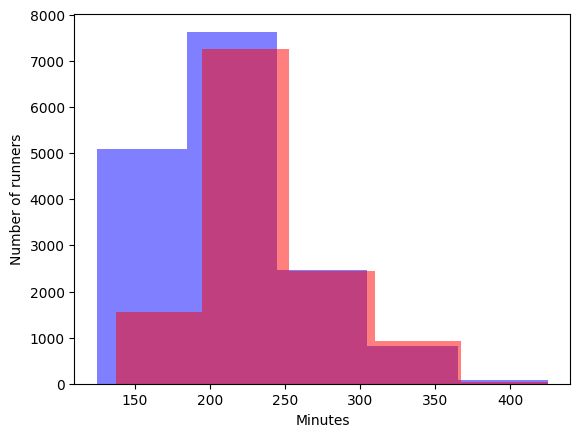

In [67]:
#5
plt.hist(bm_male["OfficialTime"], bins = 5, alpha = 0.5, color = "blue", label = "Male Times in minutes")
plt.hist(bm_female["OfficialTime"], bins = 5, alpha = 0.5, color = "red", label = "Female Times in minutes")
plt.xlabel("Minutes")
plt.ylabel("Number of runners")

6)
The distribution difference between males and females tell us that there is a difference between their times, with males usually finishing before females. But it isn't too drastic. 

In [79]:
#7
print(f"The 90th percentile for female offical time is {round(bm_female["OfficialTime"].quantile(0.90),2)} minutes.")

The 90th percentile for female offical time is 301.39 minutes.


8. Summary statistics for age groups between ages 50 and 54:

In [69]:
bm_age = bm[(bm["AgeOnRaceDay"]>49) & (bm["AgeOnRaceDay"]<55)]
bm_age.head(1)

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
436,613,Juan Carlos Cardona,"Cardona, Juan Carlos",50,M,La Ceja,NaN,NaN,0550,COL,Colombia,COL,Colombia,155.133333,437,401,1.0,Runners,NaN,NaN


In [70]:
bm_age_females = bm_age.loc[bm_age["Gender"]=="F"]
bm_age_females.describe()

,AgeOnRaceDay,OfficialTime,RankOverall,RankOverGender,RankOverDivision
count,1304.000000,1304.000000,1304.000000,1304.000000,1303.00000
mean,51.585123,246.602019,19472.060583,7373.911043,652.00000
std,1.364091,38.419807,4927.387282,2668.421836,376.28801
min,50.000000,173.733333,2950.000000,158.000000,1.00000
25%,50.000000,221.287500,16196.500000,5539.750000,326.50000
50%,51.000000,234.408333,19226.500000,7262.000000,652.00000
75%,53.000000,261.116667,23075.500000,9363.250000,977.50000
max,54.000000,424.966667,28409.000000,12230.000000,1303.00000


In [71]:
bm_age_males = bm_age.loc[bm_age["Gender"]=="M"]
bm_age_males.describe()

,AgeOnRaceDay,OfficialTime,RankOverall,RankOverGender,RankOverDivision
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,51.753507,219.967218,13720.412826,9220.566132,998.500000
std,1.412924,39.928770,7143.158402,3555.439966,576.339888
min,50.000000,155.133333,437.000000,401.000000,1.000000
25%,50.000000,192.962500,7891.750000,6559.250000,499.750000
50%,52.000000,207.241667,12345.500000,8880.500000,998.500000
75%,53.000000,235.875000,19533.000000,12049.000000,1497.250000
max,54.000000,380.750000,28372.000000,16084.000000,1996.000000


9. Box plots for age groups

Text(0, 0.5, 'Time in minutes')

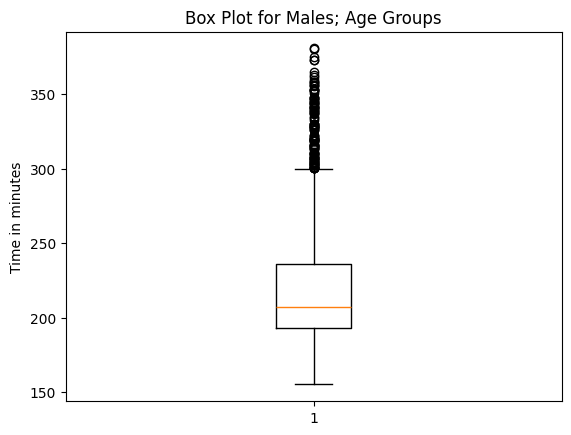

In [83]:
plt.boxplot(bm_age_males["OfficialTime"])
plt.title("Box Plot for Males; Age Groups")
plt.ylabel("Time in minutes")

Text(0, 0.5, 'Time in minutes')

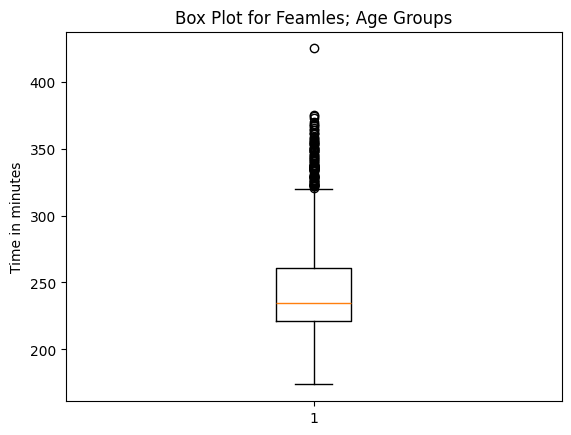

In [84]:
plt.boxplot(bm_age_females["OfficialTime"])
plt.title("Box Plot for Feamles; Age Groups")
plt.ylabel("Time in minutes")

10)

In [139]:
len(bm["CountryOfResAbbrev"])

28409

In [140]:
len(bm["CountryOfCtzAbbrev"])

28409

In [141]:
bm_usa = bm[bm["CountryOfResAbbrev"] == "USA"]
len(bm_usa)

19056

In [142]:
bm_usa.head(1)

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
3,18,Conner Mantz,"Mantz, Conner",28,M,NaN,NaN,NaN,NaN,USA,United States of America,USA,United States of America,125.133333,4,4,4.0,Runners,NaN,NaN


In [194]:
bm_states = bm_usa.groupby("StateAbbrev")[["OfficialTime"]].mean()
len(bm_states)

56

In [152]:
len(bm_usa['CountryOfResAbbrev'] == "USA") == len(bm_usa)

True

In [163]:
bm_usa.shape

(19056, 20)

In [196]:
bm_states.sort_values("OfficialTime", ascending = False).head()

,OfficialTime
StateAbbrev,
MA,251.356825
NH,242.044088
PR,237.560606
RI,234.786352
FL,232.446714


In [224]:
#10
us_states = [
    "AL ","AK ","AZ ","AR ","CA ","CO ","CT ","DE ","FL ","GA ",
    "HI ","ID ","IL ","IN ","IA ","KS ","KY ","LA ","ME ","MD ",
    "MA ","MI ","MN ","MS ","MO ","MT ","NE ","NV ","NH ","NJ ",
    "NM ","NY ","NC ","ND ","OH ","OK ","OR ","PA ","RI ","SC ",
    "SD ","TN ","TX ","UT ","VT ","VA ","WA ","WV ","WI ","WY ",
    "DC " 
]


bm_states = bm_usa[bm_usa["StateAbbrev"].isin(us_states)]


bm_states = bm_states.groupby("StateAbbrev")[["OfficialTime"]].mean()
bm_states = bm_states.sort_values("OfficialTime", ascending=False)
print(f"The fastest state is {bm_states.index[-1]}(West Virginia) with the time of {round(bm_states.iloc[-1,0])} minutes.")
print(f"The slowest state is {bm_states.index[0]}(Massachusetts) with the time of {round(bm_states.iloc[0,0])} minutes.")


The fastest state is WV (West Virginia) with the time of 197 minutes.
The slowest state is MA (Massachusetts) with the time of 251 minutes.


In [225]:
bm.head()

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,John Korir,"Korir, John",28,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,124.750000,1,1,1.0,Runners,NaN,NaN
1,7,Alphonce Felix Simbu,"Simbu, Alphonce Felix",33,M,NaN,NaN,NaN,NaN,TAN,Tanzania,TAN,Tanzania,125.066667,2,2,2.0,Runners,NaN,NaN
2,4,Cybrian Kotut,"Kotut, Cybrian",32,M,NaN,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,125.066667,3,3,3.0,Runners,NaN,NaN
3,18,Conner Mantz,"Mantz, Conner",28,M,NaN,NaN,NaN,NaN,USA,United States of America,USA,United States of America,125.133333,4,4,4.0,Runners,NaN,NaN
4,39,Muktar Edris,"Edris, Muktar",31,M,NaN,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,125.983333,5,5,5.0,Runners,NaN,NaN


In [232]:
#11
eleven = bm_usa[bm_usa["StateAbbrev"].isin(["CA ", "MA "])]
eleven.groupby("StateAbbrev")[["OfficialTime"]].mean()

,OfficialTime
StateAbbrev,
CA,218.594905
MA,251.356825


We can see that on average, Californians finish faster than Massachusetts runners, on average the difference is 33 whole minutes.